In [12]:
pip install transformers

     |████████████████████████████████| 3.4 MB 13.9 MB/s 
     |████████████████████████████████| 895 kB 61.5 MB/s 
     |████████████████████████████████| 61 kB 421 kB/s 
     |████████████████████████████████| 596 kB 63.6 MB/s 
     |████████████████████████████████| 3.3 MB 71.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import transformers
from transformers import AutoModel, AutoTokenizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zalodata_df = pd.read_json('/content/drive/MyDrive/Fine-Tune-Bert/data/training_zalodata.json')
mlqadata_df = pd.read_json('/content/drive/MyDrive/Fine-Tune-Bert/data/mlqa_vi_zalo_format.json')
xquaddata_df = pd.read_json('/content/drive/MyDrive/Fine-Tune-Bert/data/xquad_vi_zaloformat_training_data.json')

In [95]:
zalodata_df = zalodata_df.rename({'text':'context'},axis =1)

In [96]:
trainingdata = pd.concat((zalodata_df,mlqadata_df,xquaddata_df))

In [97]:
columns = ["context", 'question','label']
data = []
for index, row in trainingdata.iterrows():
  temp = []
  temp.append(row['context'])
  temp.append(row['question'])
  temp.append(int(row['label']==True))
  data.append(temp)

In [98]:
print(data[0])

['Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .', 'Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi', 1]


In [102]:
data = pd.DataFrame(data, columns=columns)

In [99]:
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
zalodata_df = pd.read_json('/content/drive/MyDrive/Fine-Tune-Bert/data/testing_zalodata.json')

In [120]:
columns = ["context", 'question','label']
data = []
for index, row in trainingdata.iterrows():
  temp = []
  temp.append(row['context'])
  temp.append(row['question'])
  temp.append(row['label'])
  data.append(temp)
data = pd.DataFrame(data, columns=columns)

In [81]:
leng = []
for index, row in data.iterrows():
  str_ = row['question']
  temp = tokenizer.tokenize(str_)
  leng.append(len(temp))

In [82]:
temp = np.sort(np.array(leng))

In [83]:
leng_dict = dict.fromkeys(temp,0) 

In [84]:
for i in temp:
  leng_dict[i] += 1

In [85]:
leng_dict.keys()

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 44, 48, 56])

In [86]:
_len = leng_dict.keys()
_num = leng_dict.values()

In [87]:
fig = plt.figure(figsize = (20, 10))

<Figure size 1440x720 with 0 Axes>

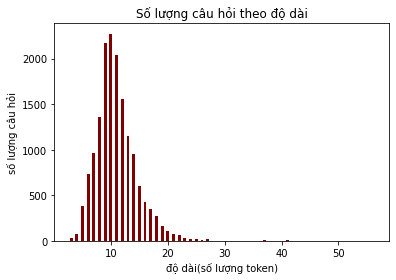

In [89]:
plt.bar(_len, _num, color ='maroon',
        width = 0.5)
plt.xlabel("độ dài(số lượng token)")
plt.ylabel("số lượng câu hỏi")
plt.title("Số lượng câu hỏi theo độ dài")
plt.show()